# Structural Motif Complexity

One of the main limitations in the generation of new immunogens through epitope grafting is the need to find a known protein structure (scaffolds) with enough local similarity to assimilate the grafted epitope while not disturbing its solubility and stability. 

To contextualize this issue, here we present the availability of carrier scaffolds for a set of known structural epitopes in function of their three dimensional complexity.

In a previous work, we developed **Rosetta FunFolDes**, a new protocol that combining grafting, folding and sequence design, is capable of exploit local heterologous proteins as carriers for epitope structures. 

[![PLoS Computational Biology](https://img.shields.io/badge/PLoS%20Computational%20Biology-doi.org/10.1371/journal.pcbi.1006623-green.svg)](https://doi.org/10.1371/journal.pcbi.1006623)

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
# Standard Libraries
import warnings; warnings.simplefilter('ignore')
import copy
import glob
import gzip
import os

# External Libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import numpy as np

# Own libraries
import rstoolbox

sns.set(font_scale=3)
matplotlib.rcParams['svg.fonttype'] = 'none'
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
rstoolbox.utils.format_Ipython()

In [3]:
# Importing specific functions for reading, process and plotting (find descriptions in scripts/readme.py)
import scripts.readme as scrm

# Scaffold Search

For each motif of interest, we perform a [_master_](http://www.grigoryanlab.org/master/) search over the __PDBnr30__ database provided by _master_ and then we use _Rosetta_ to place the binder of the motif according to the motif alignment to the matched scaffold, clean the sidechains, and evaluate clashes.

|__INFO__|__H__|__E__|__HLH__|__ELE__|__HLE__|__HxL__|
|:------:|:---:|:---:|:-----:|:-----:|:-----:|:-----:|
|Virus   |HIV  |RSV  |RSV    |DEN3   |RSV    |RSV    |
|Query   |2fx7 |3o41 |3ixt   |3vtt   |5tpn   |4jhw   |
|Match   |1z6n |     |3lhp   |3wei   |       |       |
|Design  |3lef |     |4l8i   |4x42   |       |       |
||![2fx7](README_files/2fx7.png)|![3o41](README_files/3o41.png)|![3ixt](README_files/3ixt.png)|![3vtt](README_files/3vtt.png)|![5tpn](README_files/5tpn.png)|![4jhw](README_files/4jhw.png)|

The __PDBnr30__ database contains a total of `17539` structures. This is our theoretical maximum, that we can call upon with the `total_master_list` variable.

In [4]:
total_master_list = 17539
dfs = scrm.load_master({"5tpn": 1, "2fx7": 1, "3ixt": 1, "3vtt": 1, "3o41": 1, "4jhw": 1})

## Pfam assignations

Used to check domain length. The file ```pdbmap.gz```, is downloaded from: [```ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam31.0/```](ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam31.0/).  
We will use PFAM to filter matches according to a domain size that is workable in the lab. That means between __50__ and __180__ residues. These values can be called upon through the `min_domain_size` and `max_domain_size` variables.
(The second step in this section takes quite some time to run).

In [5]:
min_domain_size, max_domain_size = 50, 180
pfam = scrm.parse_pfam("data/pdbmap.gz")

In [6]:
dfs = scrm.pfam2master(dfs, pfam)

# Plotting Database Recovery

We plot structure recovery curves over __nr30PDB__ for direct _master_ matches (blue) and _master_ matches filtered by binder target clash (green).

These plots are done both for full database (solid lines) and for putative templates under the specified `max_domain_size` (dashed lines).

A marker is set for the RMSD in which the first `top_limit` matches are found. The marker matches color and line style with its corresponding curve.

RMSD for known designs with a crystal structure available in the **Protein Data Bank** are highlighted with a full hight black dashed line.

In [7]:
top_limit = 10

### Plotting only available data on the PDB

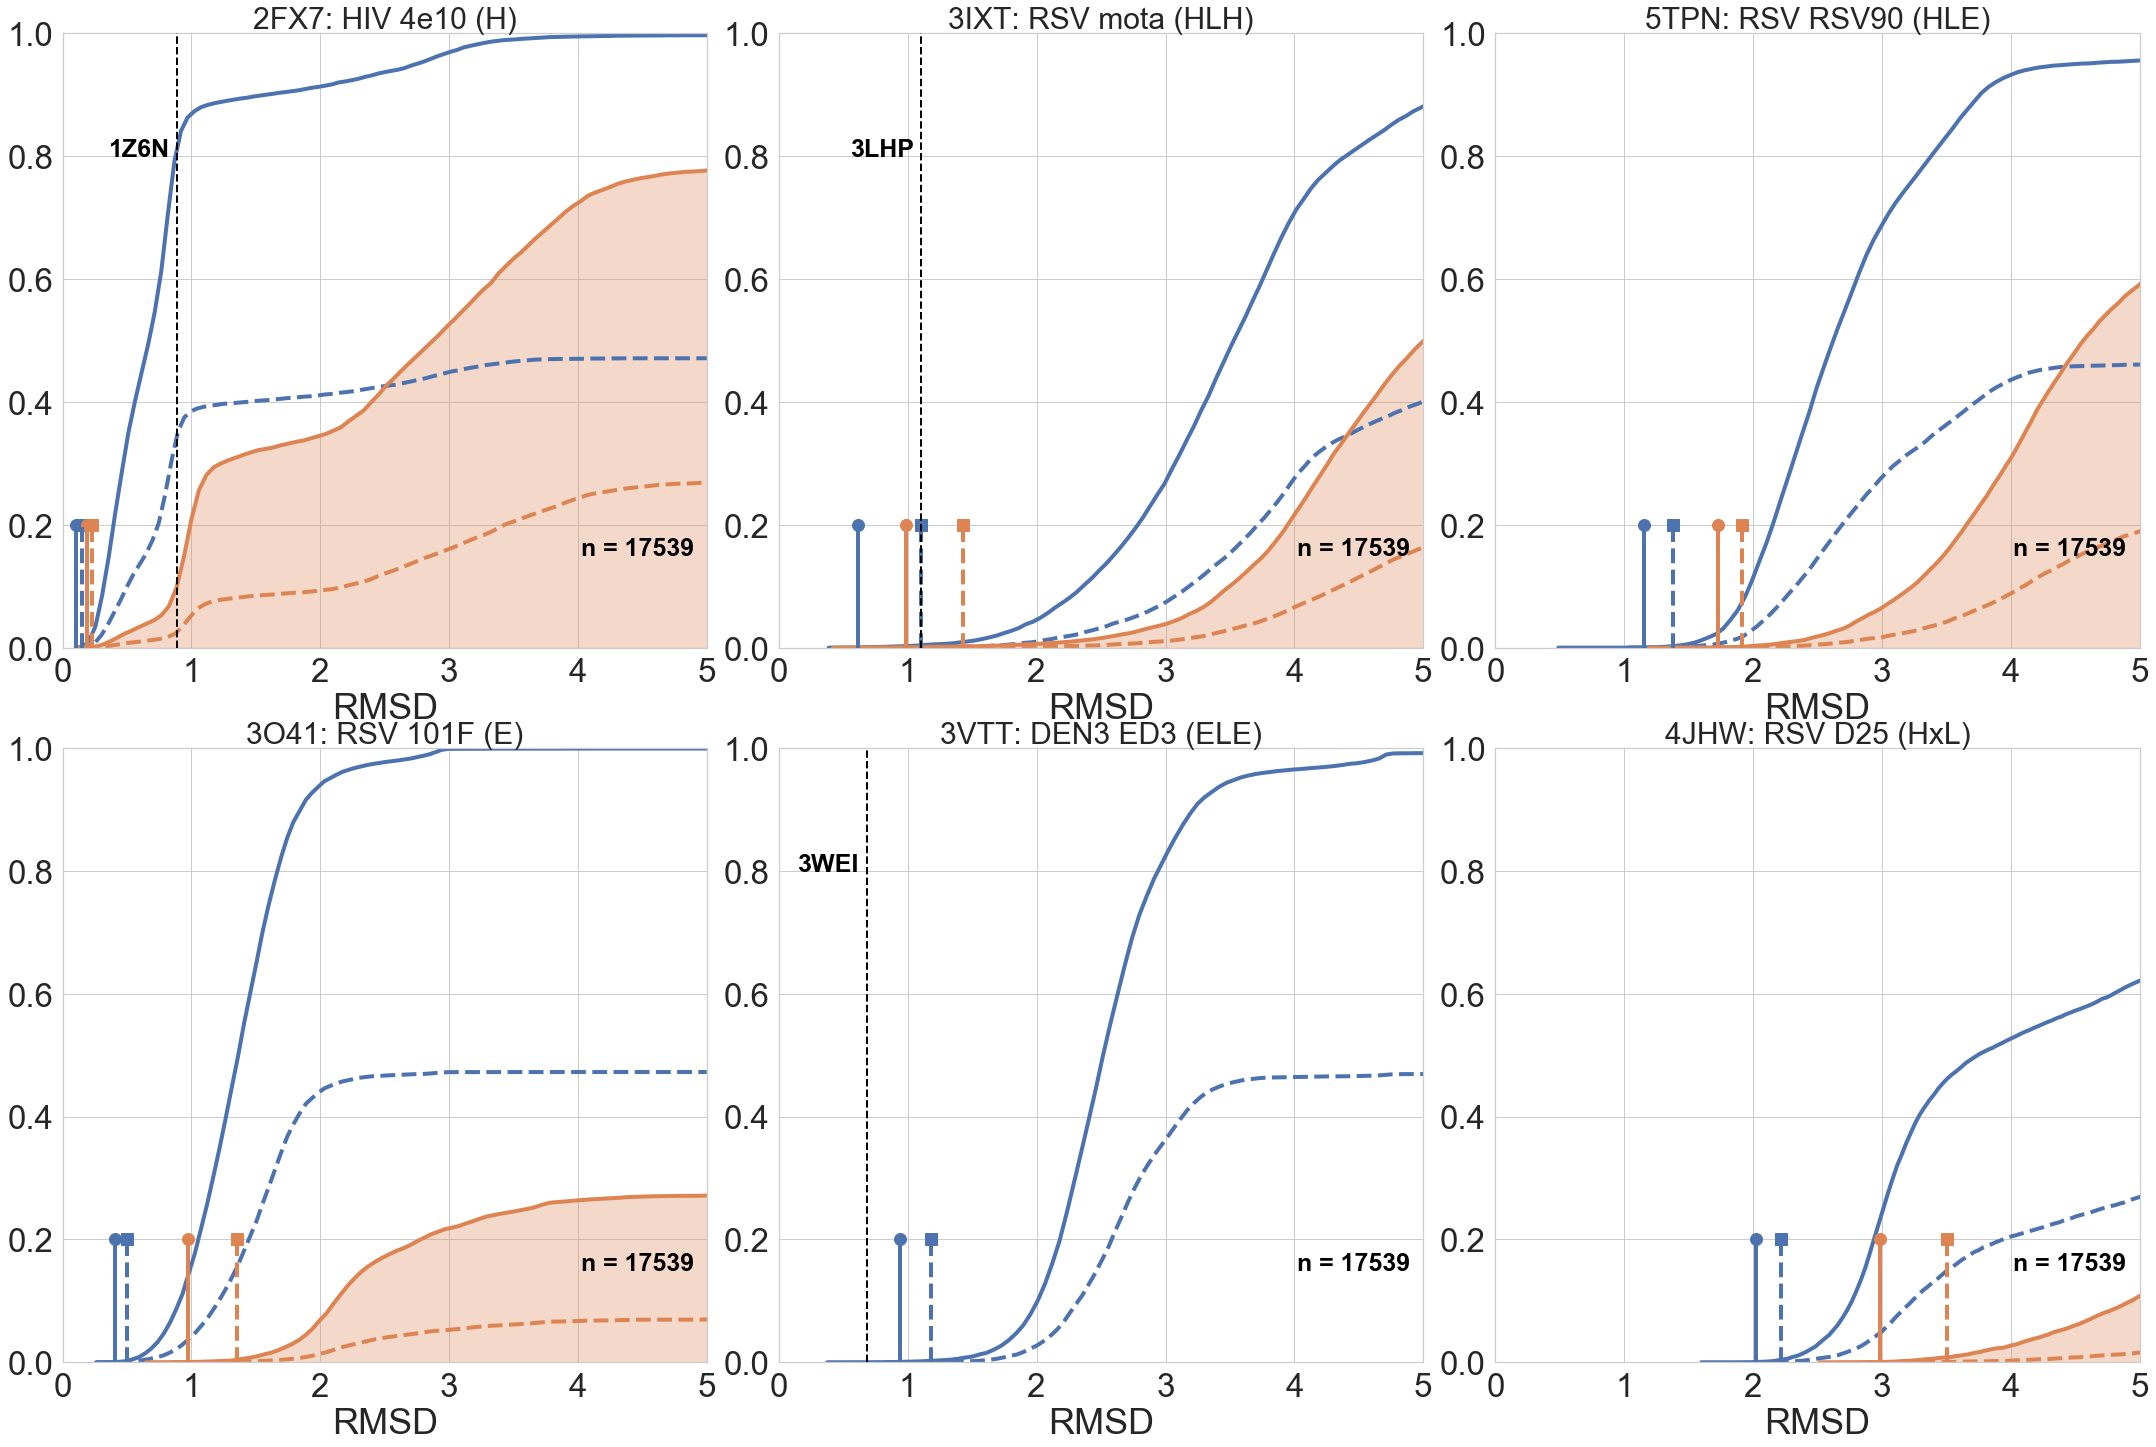

In [12]:
fig  = plt.figure(figsize=(30, 20))
scrm.plot_all(fig, dfs, total_master_list, min_domain_size, max_domain_size, top_limit, 0)
plt.tight_layout()
plt.savefig("README_files/motif_recovery.svg")
plt.savefig("README_files/motif_recovery.png")
plt.show()

### Plotting the designs including those generated on the FunFolDes paper

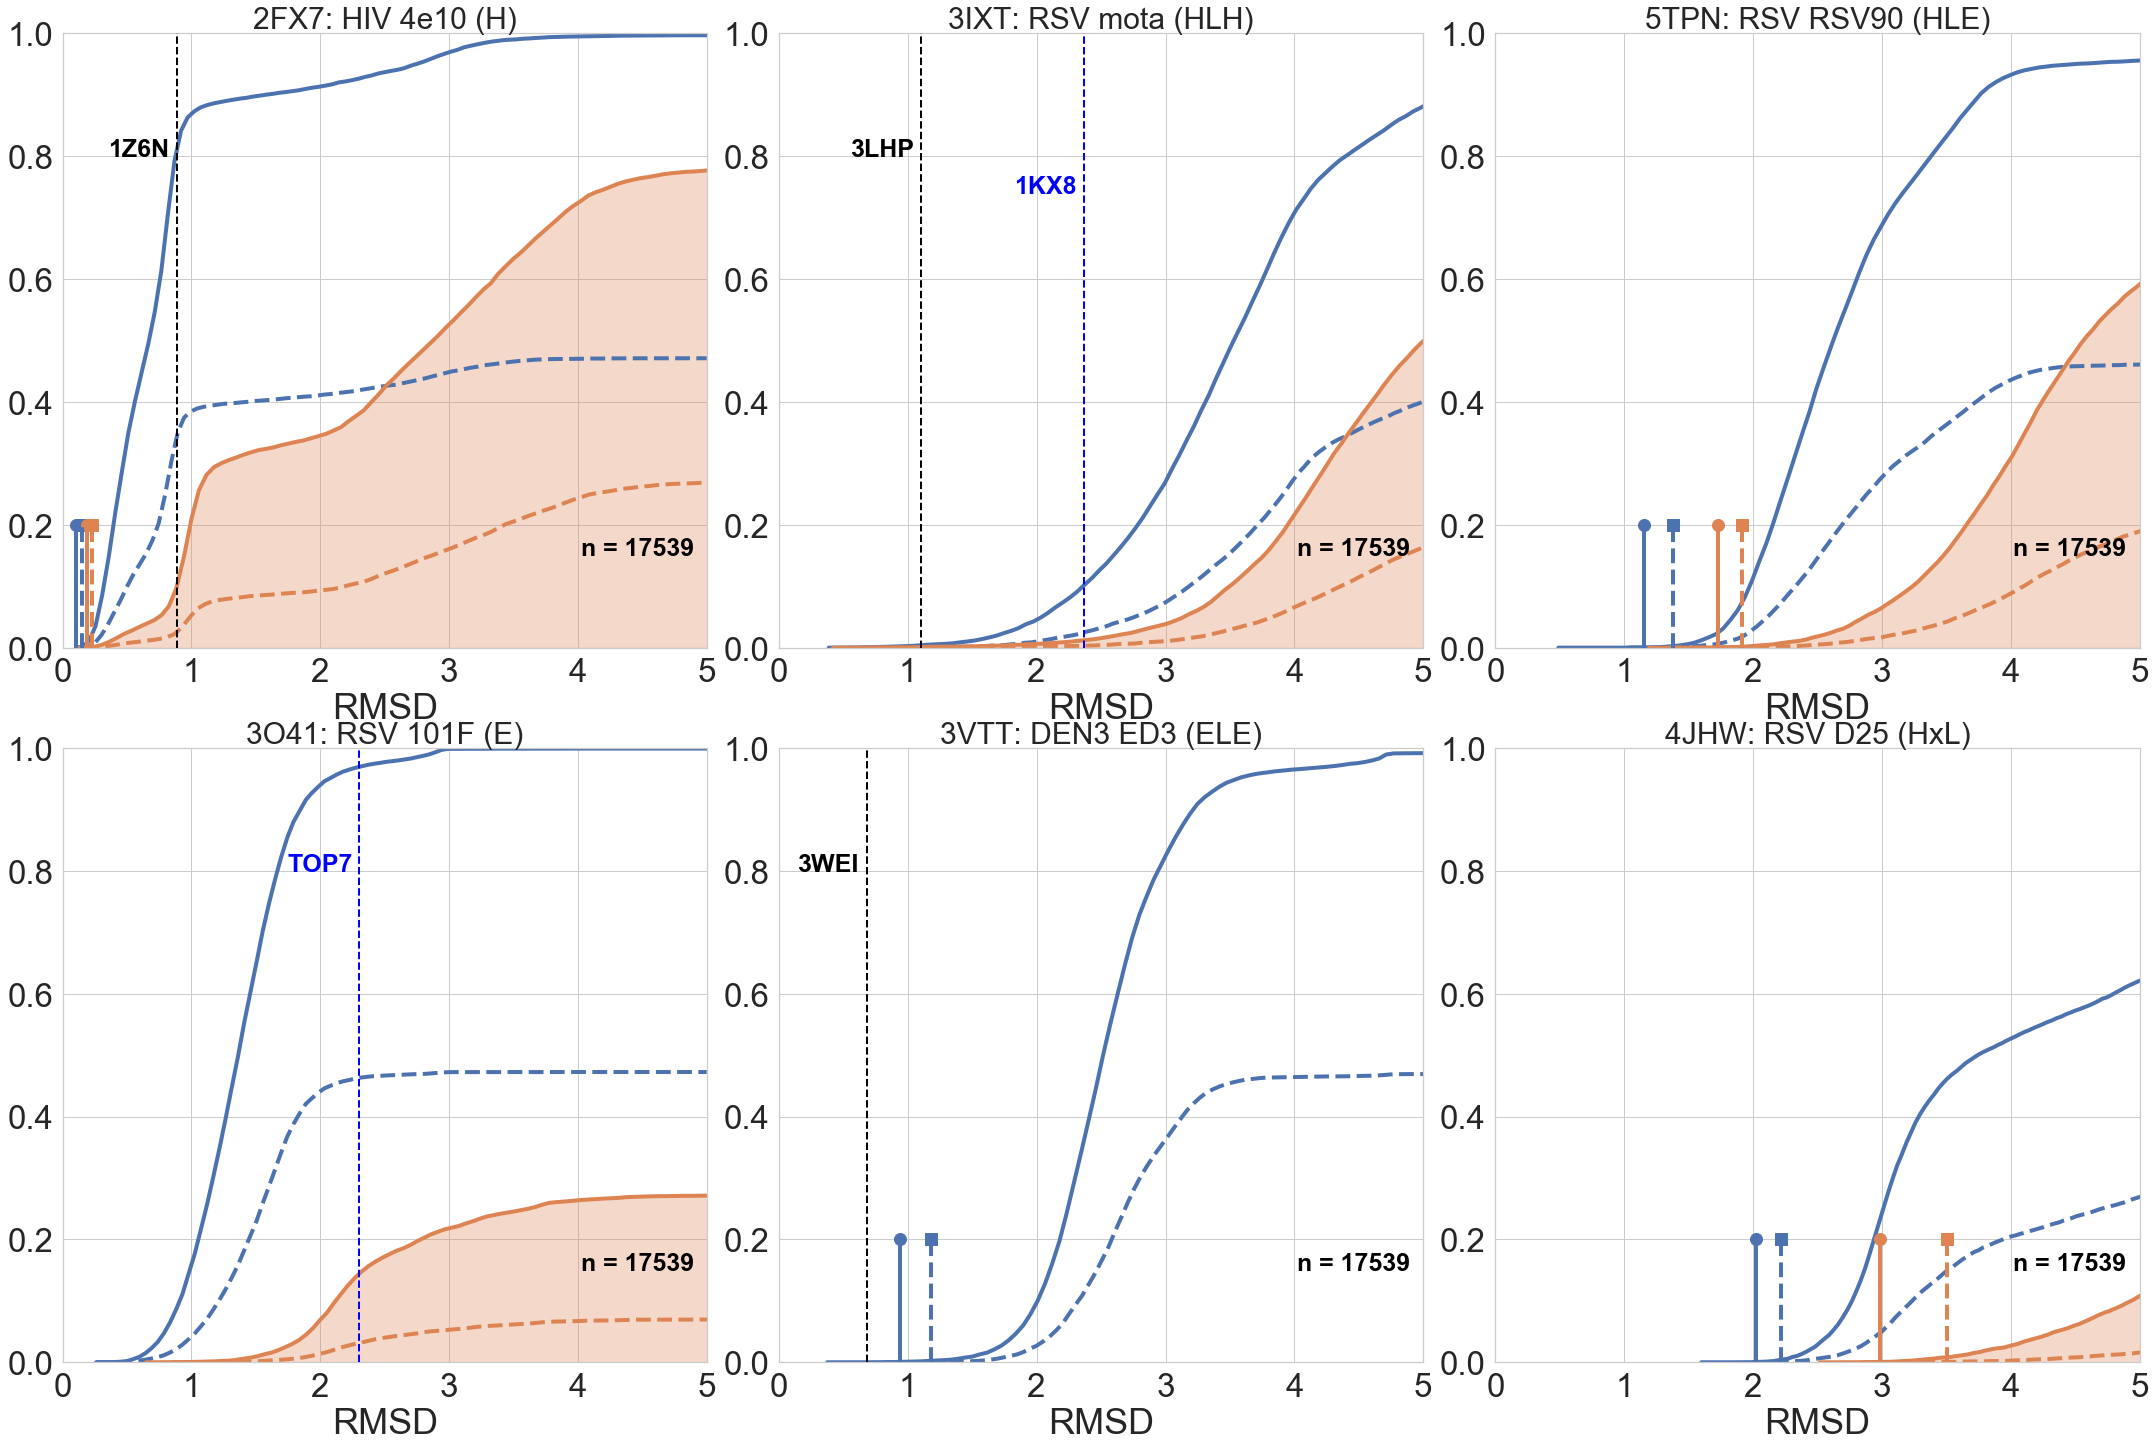

In [14]:
fig  = plt.figure(figsize=(30, 20))
scrm.plot_all(fig, dfs, total_master_list, min_domain_size, max_domain_size, top_limit, 1)
plt.tight_layout()
plt.savefig("README_files/motif_recovery_with_designs.svg")
plt.savefig("README_files/motif_recovery_with_designs.png")
plt.show()

### Plotting only data for matches compatible with binder at a usable protein size

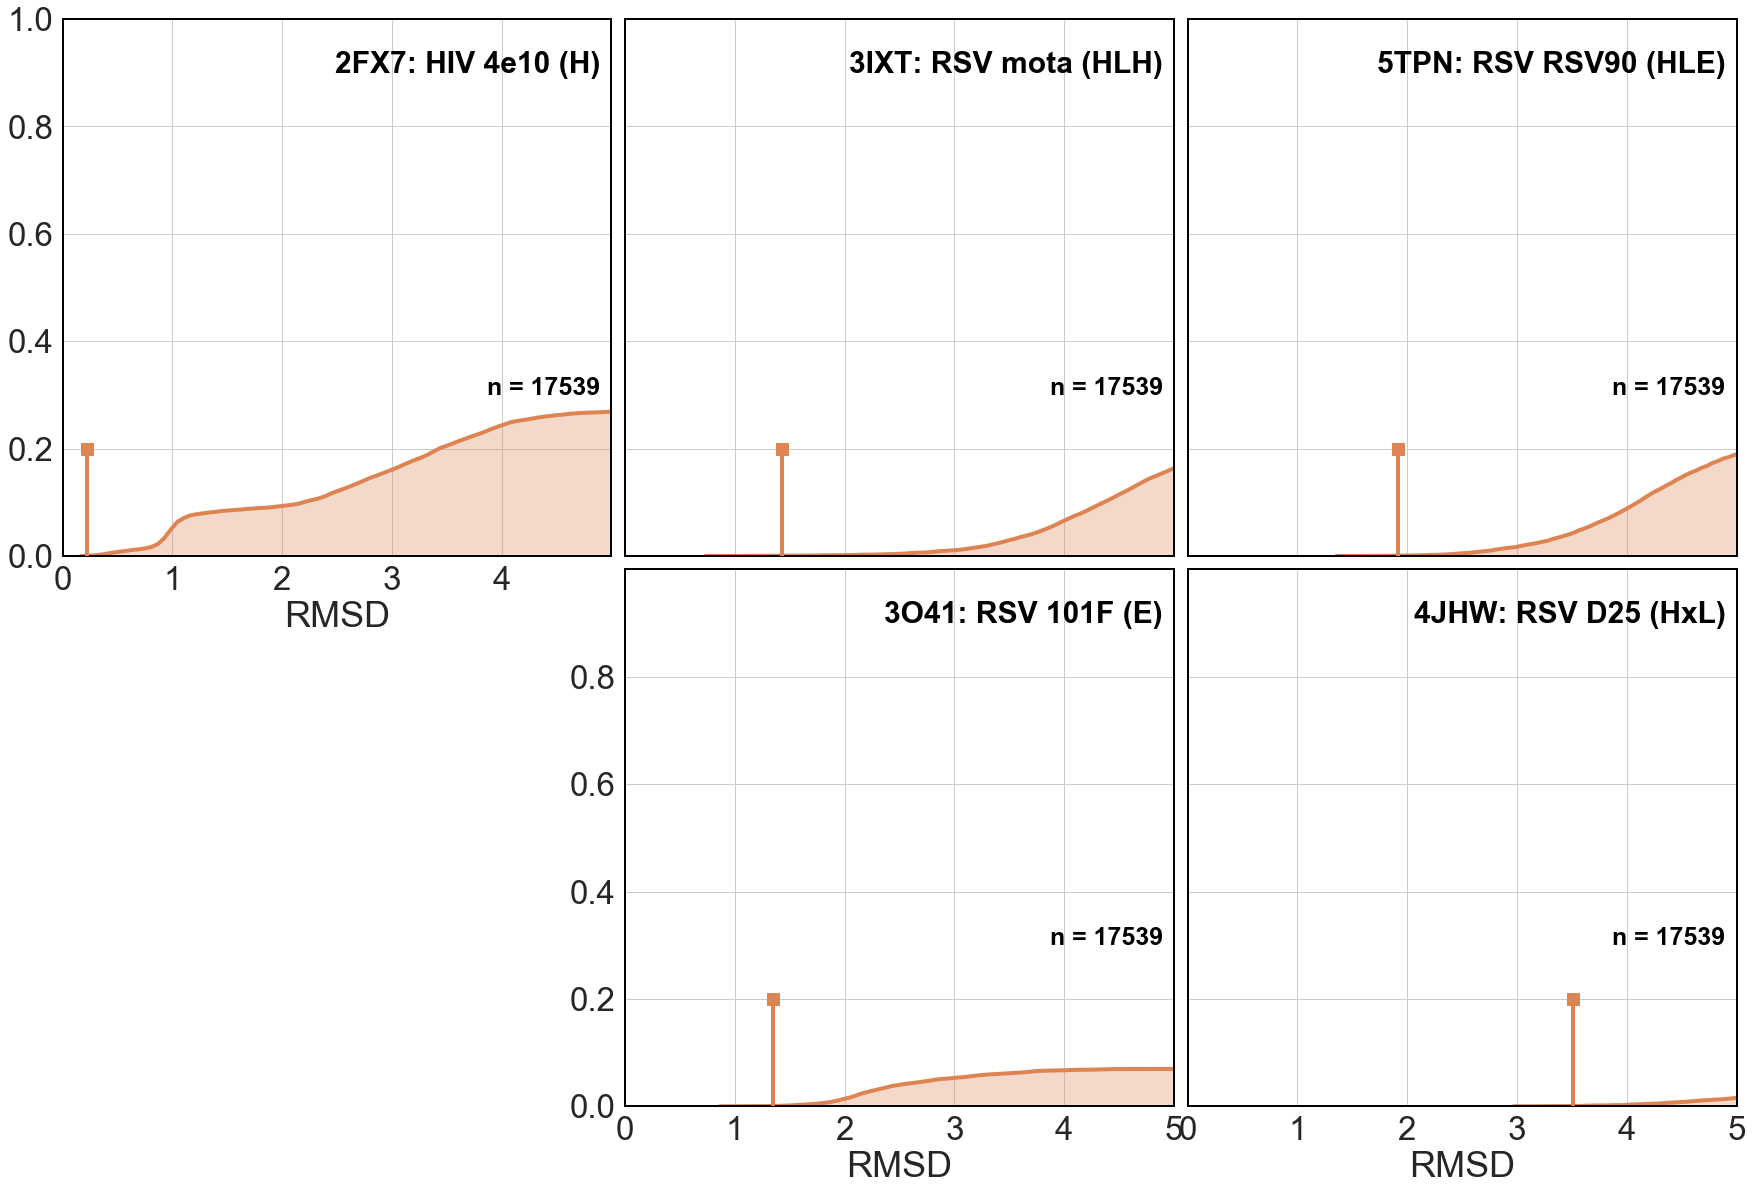

In [24]:
fig  = plt.figure(figsize=(30, 20))
scrm.plot_all_usable(fig, dfs, total_master_list, min_domain_size, max_domain_size, top_limit)
plt.subplots_adjust(hspace=0.025, wspace=0.025)
plt.savefig("README_files/motif_usable_recovery.svg")
plt.savefig("README_files/motif_usable_recovery.png")
plt.show()